In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv("drive/My Drive/ms_malware.csv")
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [ ]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 10)

In [ ]:
x=data.iloc[:,:81]
y=data.iloc[:,[82]]
#print(y)

# Missing Ratio Value

In [ ]:
a=x.isnull().sum()/len(x)*100
print(a.sort_values(ascending=False))

PuaMode                                              99.975600
Census_ProcessorClass                                99.579999
DefaultBrowsersIdentifier                            95.139590
Census_IsFlightingInternal                           83.030966
Census_InternalBatteryType                           71.028342
Census_ThresholdOptIn                                63.502727
Census_IsWIMBootEnabled                              63.414727
SmartScreen                                          35.659071
OrganizationIdentifier                               30.871662
SMode                                                 6.011612
CityIdentifier                                        3.641807
Wdft_IsGamer                                          3.418207
Census_InternalBatteryNumberOfCharges                 3.025006
Census_FirmwareManufacturerIdentifier                 2.052004
Census_FirmwareVersionIdentifier                      1.791204
Census_IsFlightsDisabled                              1

In [ ]:
variables = x.columns
variable = [ ]
for i in range(0,len(a)):
    if a[i]<=80:   #setting the threshold as 80%
        variable.append(variables[i])
print(len(variable))

77


In [ ]:
x1=x[variable]

col=x1.columns
num=LabelEncoder()
for i in col:
    if x1[i].dtype.name=='object':
        x1[i]=num.fit_transform(x1[i].astype('str'))

for i in variable:
    if a[i]>0:
        x1[i].fillna(x1[i].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
print(x1.isnull().values.any())

False


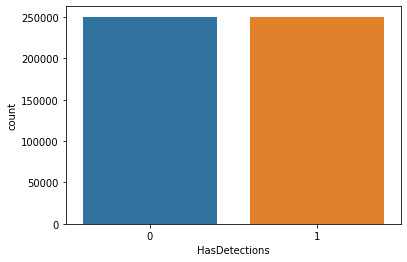

In [ ]:
sns.countplot(data['HasDetections'],label='count')

# Low Variance Filter

In [ ]:
x1.var().sort_values()

Census_IsWIMBootEnabled                              0.000000e+00
Census_IsFlightsDisabled                             7.999967e-06
IsBeta                                               9.999940e-06
AutoSampleOptIn                                      2.799933e-05
Census_ThresholdOptIn                                1.059696e-04
SMode                                                4.298050e-04
Census_IsPortableOperatingSystem                     6.355980e-04
Census_DeviceFamily                                  1.613395e-03
Census_IsVirtualDevice                               6.901637e-03
HasTpm                                               1.202974e-02
IsSxsPassiveMode                                     1.698726e-02
Firewall                                             2.083016e-02
AVProductsEnabled                                    2.768017e-02
Census_IsPenCapable                                  3.653397e-02
ProductName                                          4.243250e-02
IsProtecte

In [ ]:
x1.drop('Census_IsFlightsDisabled',axis=1,inplace=True)
x1.drop('IsBeta',axis=1,inplace=True)
x1.drop('AutoSampleOptIn',axis=1,inplace=True)
x1.drop('SMode',axis=1,inplace=True)
x1.drop('Census_IsPortableOperatingSystem',axis=1,inplace=True)
x1.drop('Census_IsWIMBootEnabled',axis=1,inplace=True)
x1.drop('Census_ThresholdOptIn',axis=1,inplace=True)
x1.drop('Census_DeviceFamily',axis=1,inplace=True)
x1.drop('Census_IsVirtualDevice',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# High Correlation Filter

In [ ]:
x1['HasDetections']=y
x1.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,...,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
MachineIdentifier,1.000000,0.001117,-0.002803,-0.001537,-0.003375,...,0.000943,0.000484,-0.001376,0.001071,0.000594
ProductName,0.001117,1.000000,-0.015311,0.159581,-0.014822,...,0.029465,0.017530,0.025258,0.065091,0.003072
EngineVersion,-0.002803,-0.015311,1.000000,0.295587,0.962955,...,0.005816,0.013879,0.011027,0.055676,0.051757
AppVersion,-0.001537,0.159581,0.295587,1.000000,0.302092,...,0.021791,0.006354,0.062224,0.086659,0.022732
AvSigVersion,-0.003375,-0.014822,0.962955,0.302092,1.000000,...,0.005422,0.015921,0.010822,0.062169,0.054814
RtpStateBitfield,0.000046,-0.005136,0.004592,0.023155,0.004091,...,0.010950,0.008319,0.020381,-0.022752,0.039296
IsSxsPassiveMode,-0.000200,0.013804,0.002963,-0.013947,0.005437,...,-0.007223,-0.004514,-0.016062,0.028127,-0.032781
AVProductStatesIdentifier,-0.000760,0.150586,0.061957,0.118598,0.057096,...,0.040449,0.036206,0.062654,-0.022417,0.116370
AVProductsInstalled,0.001871,0.024011,-0.115047,-0.114382,-0.115942,...,-0.011613,-0.029092,-0.069214,0.015060,-0.148703
AVProductsEnabled,0.000348,-0.043552,-0.030222,-0.072053,-0.030195,...,-0.000057,-0.009002,-0.019187,-0.012975,-0.040675


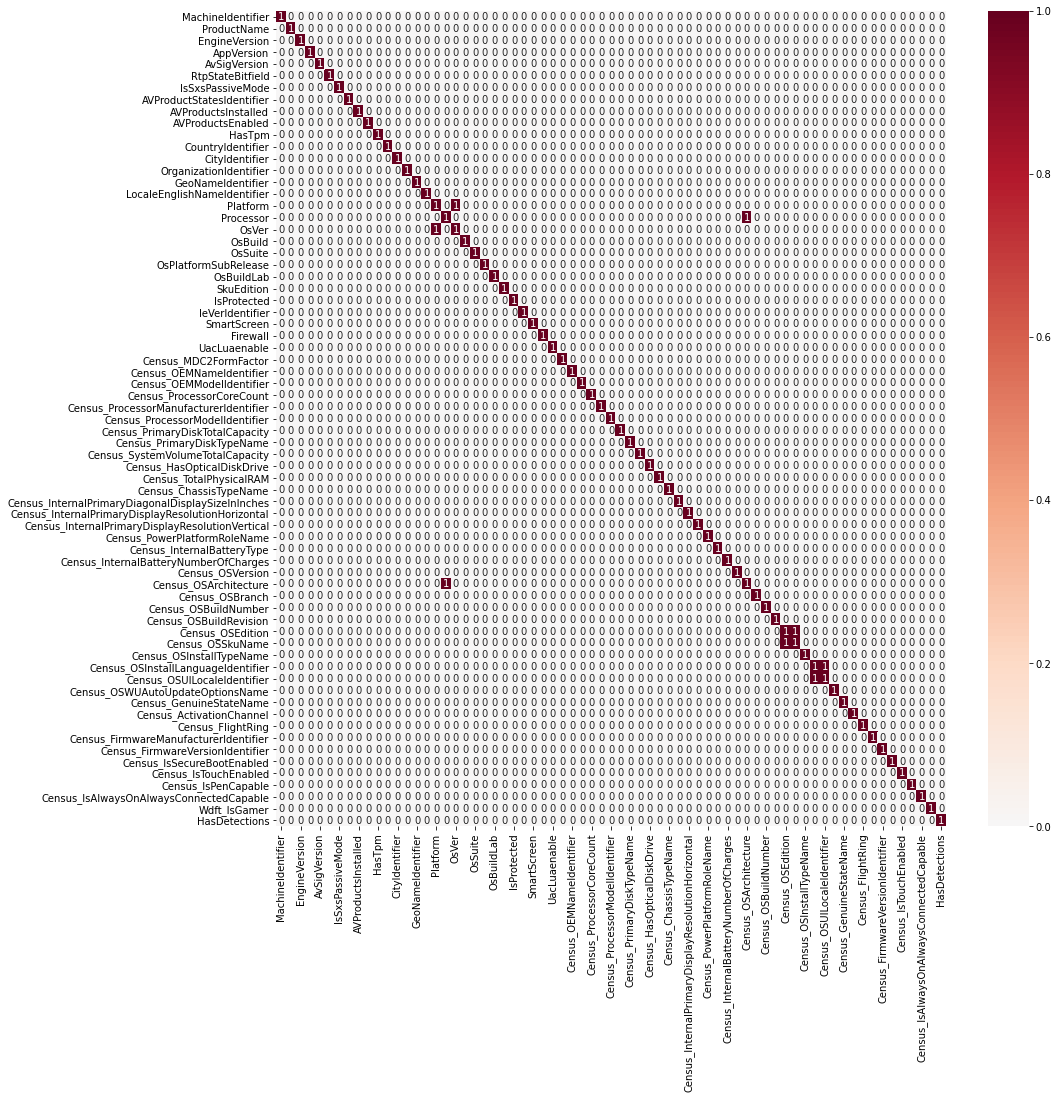

In [ ]:
corr = x1.corr()
high_corr = (corr >= 0.98).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [ ]:
x1.drop('HasDetections',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x1.drop('Platform',axis=1,inplace=True)
x1.drop('Census_OSSkuName',axis=1,inplace=True)
x1.drop('Census_OSInstallLanguageIdentifier',axis=1,inplace=True)
x1.drop('Processor',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
c=x1.columns
print(len(c))

64


# PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x1)
x1_trans = scaler.transform (x1)
print(x1_trans)

[[0.00000000e+00 7.50000000e-01 9.44444444e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00000800e-06 7.50000000e-01 7.59259259e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.00001600e-06 7.50000000e-01 9.44444444e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99994000e-01 7.50000000e-01 9.44444444e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99996000e-01 7.50000000e-01 9.62962963e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99998000e-01 7.50000000e-01 9.44444444e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


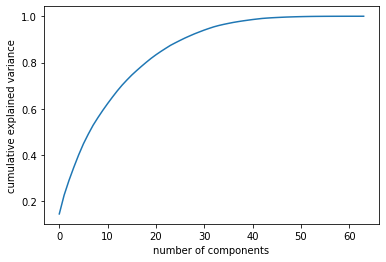

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64).fit(x1_trans)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [ ]:
pca = PCA (n_components = 50)
principle_components = pca.fit_transform (x1_trans)
principleDf = pd.DataFrame(data = principle_components)

In [ ]:
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split (principleDf, y,train_size=0.1,test_size=0.1,random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression().fit(X_train, y_train)
LRPredict = LRModel.predict(X_test)
accuracy1 = accuracy_score (LRPredict, y_test)
print(accuracy1*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


61.09


In [ ]:
from sklearn import tree
treeModel = tree.DecisionTreeClassifier(max_depth=5).fit (X_train, y_train)
treePredict = treeModel.predict (X_test)
accuracy2 = accuracy_score (treePredict, y_test)
print (accuracy2*100)

58.728


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier().fit (X_train, y_train)
RFPredict = RFModel.predict(X_test)
accuracy3 = accuracy_score (RFPredict, y_test)
print(accuracy3*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


61.68


In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=10000,gamma=0.001)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score (y_pred, y_test)
print(accuracy1*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


61.09


In [ ]:
l=[]

for i in range(len(LRPredict)):
    k=[LRPredict[i],treePredict[i],RFPredict[i],y_pred[i]]
    l.append(k)

#print(l)

li=[]

for i in range(len(l)):
    c=0
    c1=0
    for j in range(len(l[i])):
        if l[i][j]==0:
            c=c+1
        else:
            c1=c1+1
    if c>c1:
        li.append(0)
    else:
        li.append(1)
lis=np.array(li)
accuracy4=accuracy_score (lis, y_test)
print(accuracy4*100)

61.906000000000006


# Random Forest Feature Seclection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfsmodel = RandomForestRegressor(random_state=1, max_depth=10)
rfsmodel.fit(x1,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

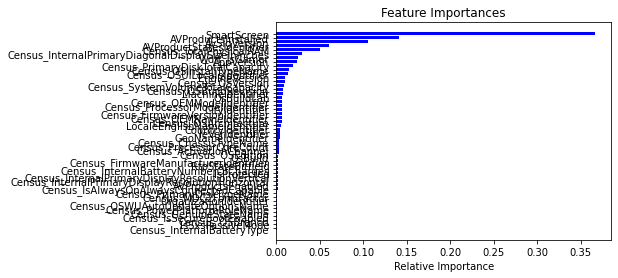

In [ ]:
features = x1.columns
importances = rfsmodel.feature_importances_
indices = np.argsort(importances)[-50:]  # top 50 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams['figure.figsize']=(9,9)
plt.show()

In [ ]:
x1_sel=pd.DataFrame()
for i in indices:
    s=features[i]
    x1_sel[s]=x1[s]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split (x1_sel, y,train_size=0.1,test_size=0.1,random_state=21)

In [ ]:
LRModel1 = LogisticRegression().fit(X_train1, y_train1)
LRPredict1 = LRModel1.predict(X_test1)
accuracy11 = accuracy_score(LRPredict1, y_test1)
print(accuracy11*100)

50.593999999999994


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
treeModel1 = tree.DecisionTreeClassifier(max_depth=5).fit (X_train1, y_train1)
treePredict1 = treeModel1.predict (X_test1)
accuracy21 = accuracy_score(treePredict1, y_test1)
print (accuracy21*100)

61.162000000000006


In [ ]:
RFModel1 = RandomForestClassifier().fit (X_train1, y_train1)
RFPredict1 = RFModel1.predict(X_test1)
accuracy31 = accuracy_score (RFPredict1, y_test1)
print(accuracy31*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


62.894000000000005


In [ ]:
from sklearn.svm import SVC
model1=SVC(kernel='rbf',C=10000,gamma=0.001)
model1.fit(X_train1,y_train1)
y_pred1=model1.predict(X_test1)
accuracyS1 = accuracy_score (y_pred1, y_test1)
print(accuracyS1*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.57000000000001


In [ ]:
l1=[]

for i in range(len(LRPredict1)):
    k=[LRPredict1[i],treePredict1[i],RFPredict1[i],y_pred1[i]]
    l1.append(k)
li1=[]

for i in range(len(l1)):
    c=0
    c1=0
    for j in range(len(l1[i])):
        if l1[i][j]==0:
            c=c+1
        else:
            c1=c1+1
    if c>c1:
        li1.append(0)
    else:
        li1.append(1)
lis1=np.array(li1)
accuracy41=accuracy_score (lis1, y_test1)
print(accuracy41*100)

50.593999999999994
